In [25]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2


In [26]:
def hit_miss(img, filt):
#     img = np.array(img)
#     new_img = np.zeros(img.shape)
    new_img = img.copy()
    h, w = new_img.shape
    for i in range(1, h-1):
        for j in range(1, w-1):
            temp = img[i-1:i+2, j-1:j+2]
            chk = 1
            for ii in range(3):
                for jj in range(3):
                    if filt[ii,jj] != -1 and temp[ii,jj] != filt[ii,jj]:
                        chk = -1
                        break
                if chk == -1:
                    break
            if chk != -1:
                new_img[i,j] = 0
#             else:
#                 new_img[i,j] = img[i,j]
    return new_img

In [27]:
def skeletonisation(img, S1, S2):
    img_bin = cv2.threshold(img,127,1,cv2.THRESH_BINARY_INV)[1]
    img_bin = np.array(img_bin)
    img_bin = img_bin.astype('uint8')
#     img_bin = (img<127).astype(np.uint8)
    while True:
        new_img = img_bin
        for i in range(4):
            new_img = hit_miss(new_img, S1)
            new_img = hit_miss(new_img, S2)
            S1 = np.rot90(S1)
            S2 = np.rot90(S2)

        diff = np.mean(np.abs(new_img - img_bin))
        print(diff)
        
        if diff <= 2:
            break
        else:
            img_bin = new_img
        
    return new_img

In [28]:
S1 = [[0,0,0],[-1,1,-1],[1,1,1]]
S1 = np.array(S1)
S2 = [[-1,0,0],[1,1,0],[-1,1,-1]]
S2 = np.array(S2)

26.476171875
24.45875
17.2496875
8.979453125
2.981640625
0.665390625


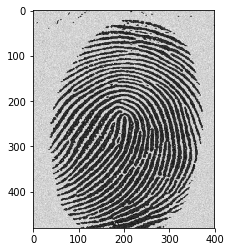

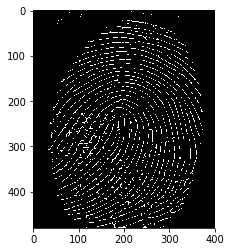

In [29]:
img = cv2.imread('../input/Q1.jpg',0)
# img1 = Image.open('../input/Q1.jpg')
# img1 = img1.convert('L')
img = np.array(img)
# img1 = np.array(img1)
# print(img1 == img)
# temp = (img1 < 127).astype(np.uint8)
# print(img.shape)
# img_bin = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)[1]
new_img = skeletonisation(img,S1,S2)
# # cv2.imwrite('binary_image.png', img_bw)


# img_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
# img_bin = np.array(img_bin)
# img_bin = img_bin.astype('uint8')
# new_img = (img < 127).astype(np.uint8)
# img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
# img_bin = 1-img_bin

# print(np.mean(np.abs(img_bin - new_img)))
plt.imshow(img,cmap='gray');plt.show()
plt.imshow(new_img,cmap='gray');plt.show()

### Q1. 2
    S1: To detect edges and other curves which are close to being edge, curves etc. 
    S2: We use this structuring element to detect right angled triangles
### Q1.3
    1. Rotation by 90 is required to detect horizontal and vector edges and right hand corners
    2. More iterations give thinner result. Hence more iterations thinner the skeleton.
### Q1.4    

3.1629939800232094
2.222715828083554
1.6543214833388593


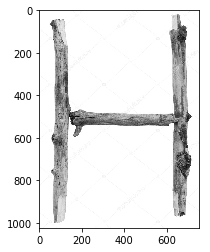

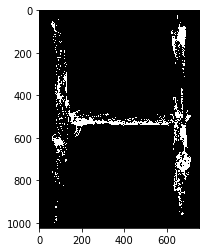

In [30]:
img1 = cv2.imread('../input/sticks.jpg',0)
img1 = np.array(img1)
new_img = skeletonisation(img1,S1,S2)
plt.imshow(img1,cmap='gray');plt.show()
plt.imshow(new_img,cmap='gray');plt.show()

4.713636363636364
3.205940082644628
2.41301652892562
1.846642561983471


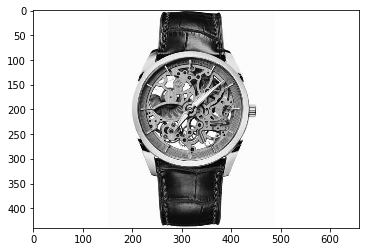

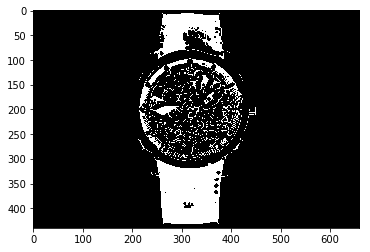

In [31]:
img1 = cv2.imread('../input/watch.jpg',0)
img1 = np.array(img1)
new_img = skeletonisation(img1,S1,S2)
plt.imshow(img1,cmap='gray');plt.show()
plt.imshow(new_img,cmap='gray');plt.show()

7.344
7.45875
6.79575
6.661875
6.496125
6.48975
6.215625
5.731125
5.386875
5.06175
4.692
4.277625
4.04175
3.716625
3.525375
3.04725
2.76675
2.696625
2.530875
2.339625
2.122875
1.92525


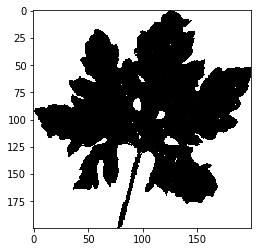

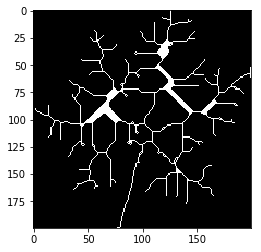

In [32]:
img1 = Image.open('../input/leaf.jpg').convert('L')
img1 = img1.resize((200,200),Image.NEAREST)
img1 = np.array(img1)
new_img = skeletonisation(img1,S1,S2,)
plt.imshow(img1,cmap='gray');plt.show()
plt.imshow(new_img,cmap='gray');plt.show()